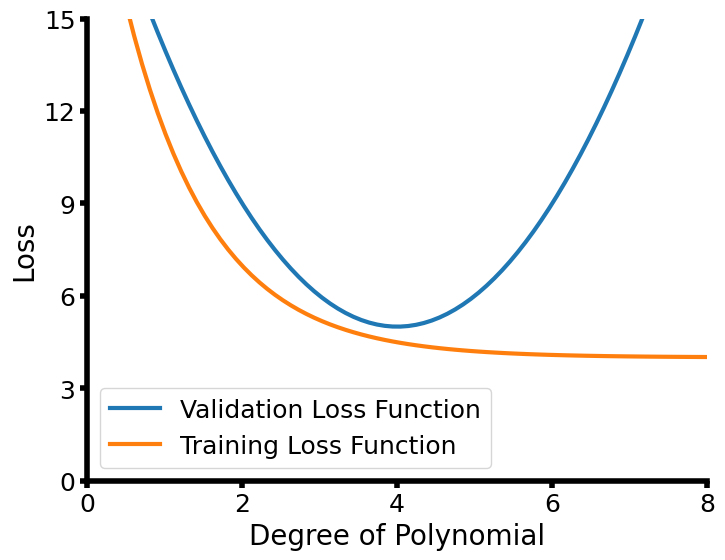

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function (quadratic) for validation
def val_loss_function(x, degree):
    return (x - 4)**2 + degree

# Define the loss function (exponential decay) for training
def train_loss_function(x, degree):
    return 18 * np.exp(-0.9 * (x)) + degree

# Define the range for degree of polynomial
degree_range = np.linspace(0, 10, 100)

# Calculate loss values for validation and training
val_loss_values = val_loss_function(degree_range, 5)
train_loss_values = train_loss_function(degree_range, 4)

# Plot the loss functions
plt.figure(figsize=(8, 6))
plt.plot(degree_range, val_loss_values, label='Validation Loss Function', linewidth=3)
plt.plot(degree_range, train_loss_values, label='Training Loss Function', linewidth=3)

#make axes thicker
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['left'].set_linewidth(4)

# Increase font size, make bold, and change to Aptos font
plt.tick_params(axis='both', which='major', labelsize=18)

# remove some ticks
plt.gca().xaxis.set_tick_params(width=4, size=5)
plt.gca().yaxis.set_tick_params(width=4, size=5)

# make less ticks
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(5))

# plt.title('Training and Validation Loss Functions')
plt.xlabel('Degree of Polynomial', fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(fontsize=18)
plt.ylim(0, 15)
plt.xlim(0, 8)
# plt.grid(True)
plt.savefig(f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/val_train_loss_ex.png', dpi=400)


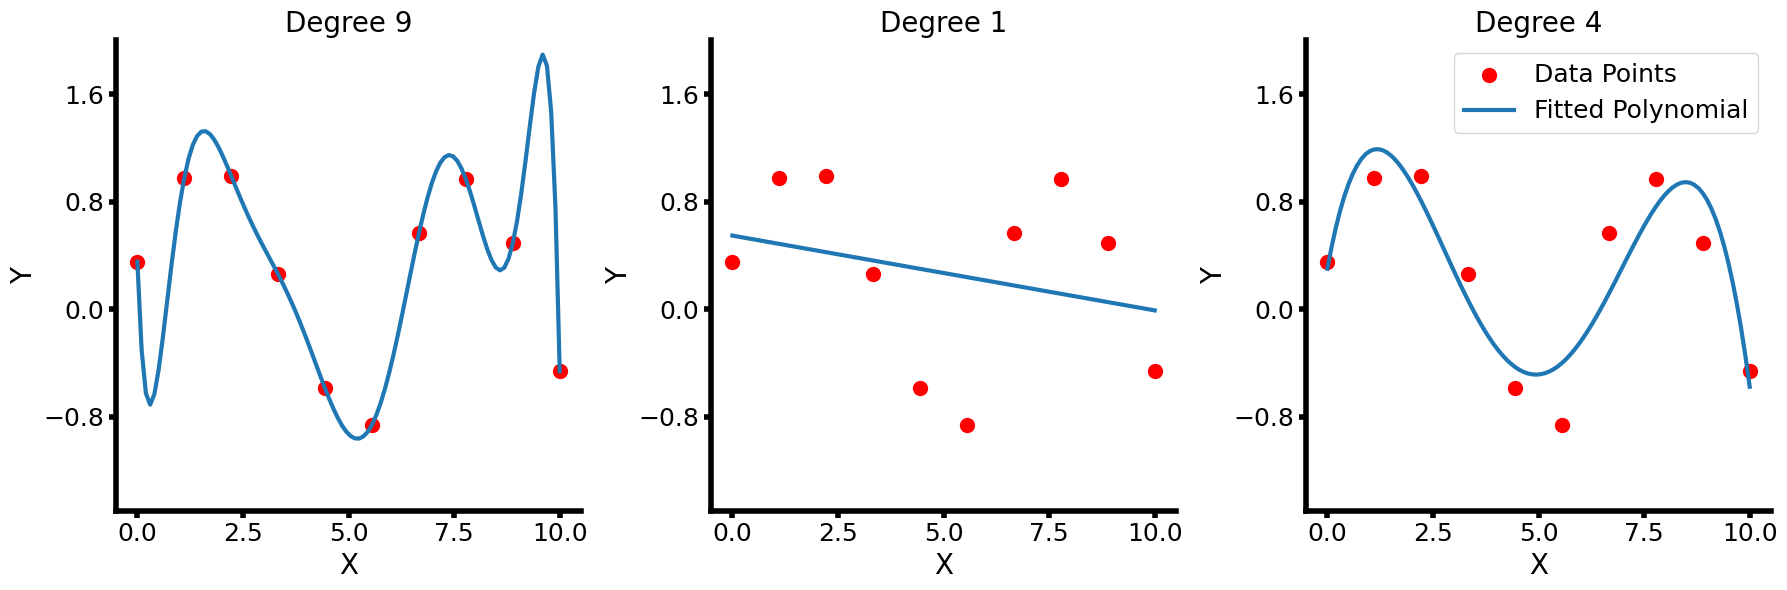

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points
np.random.seed(0)
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(0, 0.2, 10)

# Define the range for degree of polynomial
degree_range = np.linspace(0, 10, 100)

# Function to fit polynomial and plot
def fit_and_plot_polynomial(degree, ax):
    # Fit polynomial
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    # Plot data points
    ax.scatter(x, y, color='red', label='Data Points', marker='o', s=100)

    # Plot polynomial curve
    ax.plot(degree_range, poly(degree_range), label='Fitted Polynomial', linewidth=3)

    # Set title and labels
    ax.set_title(f'Degree {degree}', fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_ylim(-1.5, 2)  # Set the same y-axis limit for all subplots

    #make axes thicker
    ax.spines['top'].set_linewidth(0)
    ax.spines['right'].set_linewidth(0)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['left'].set_linewidth(4)

    # Increase font size, make bold, and change to Aptos font
    ax.tick_params(axis='both', which='major', labelsize=18)

    # remove some ticks
    ax.xaxis.set_tick_params(width=4, size=5)
    ax.yaxis.set_tick_params(width=4, size=5)

    # make less ticks
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    # Add legend for the last subplot
    if degree == 4:
        ax.legend(fontsize=18)


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Overfitting example (Degree 9 polynomial)
fit_and_plot_polynomial(9, axes[0])

# Underfitting example (Degree 1 polynomial)
fit_and_plot_polynomial(1, axes[1])

# Correct fitting example (Adjusted for Degree 4 polynomial)
fit_and_plot_polynomial(4, axes[2])


plt.tight_layout()
plt.savefig(f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/over_under_fit.png', dpi=400)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


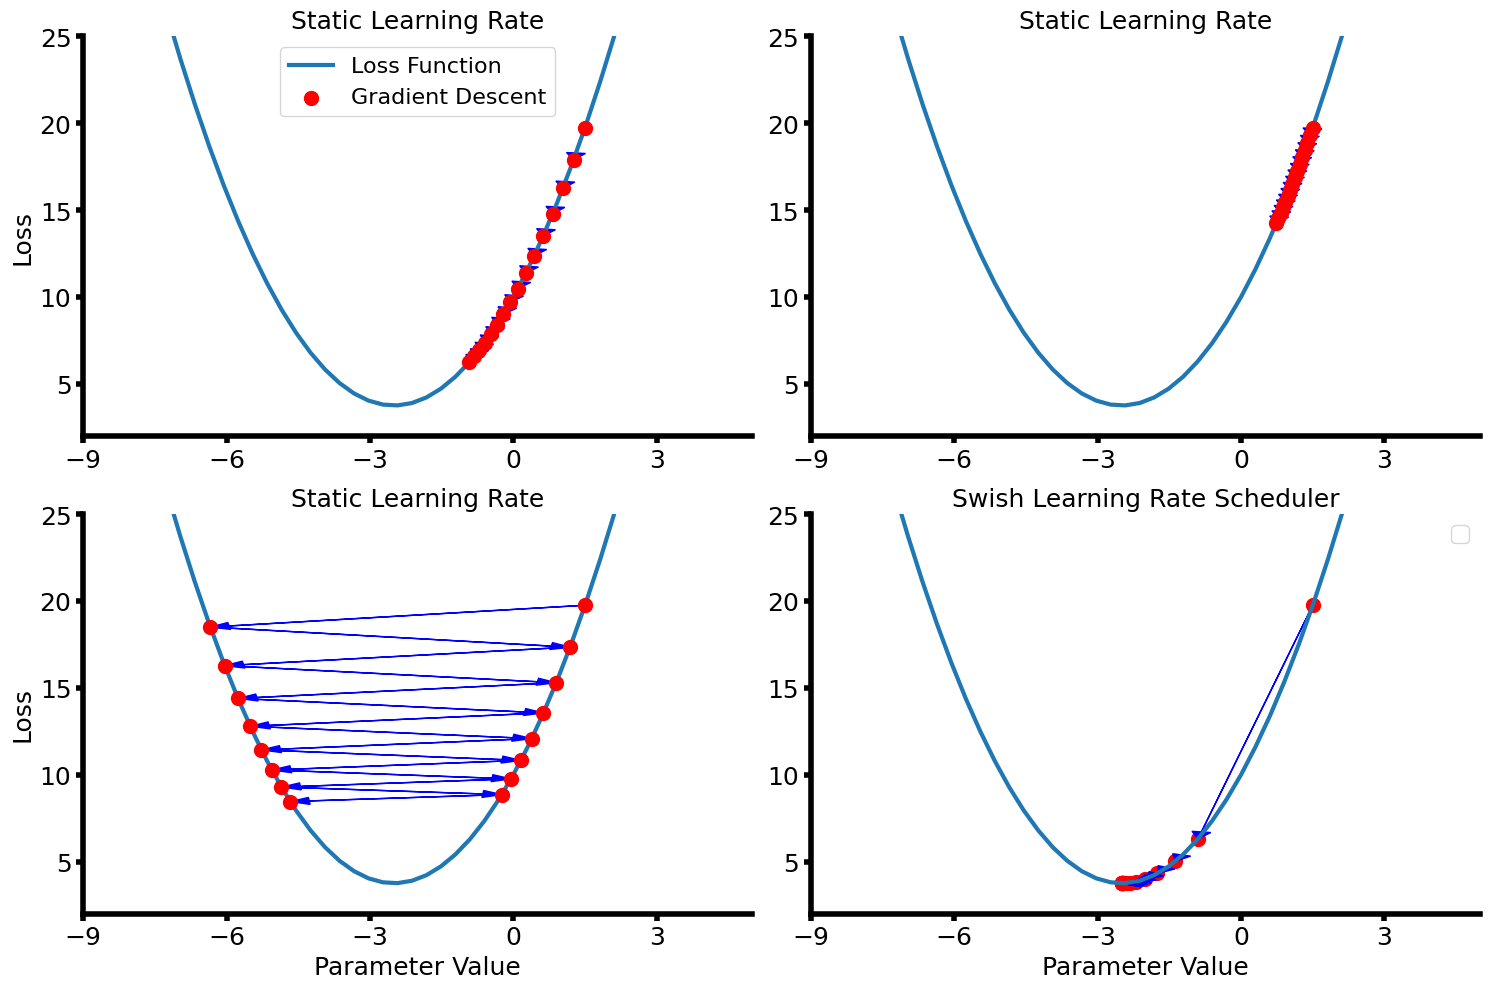

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function (quadratic)
def loss_function(x):
    return x**2 + 5*x + 10

# Define the derivative of the loss function
def gradient(x):
    return 2*x + 5

# Gradient descent algorithm
def gradient_descent(learning_rate, iterations):
    x = 1.5  # Initial guess for minimum
    trajectory = [x]
    for _ in range(iterations):
        gradient_value = gradient(x)
        x -= learning_rate * gradient_value
        trajectory.append(x)
    return trajectory

# Swish-inspired learning rate scheduler
def swish_scheduler(initial_learning_rate, iteration):
    # Swish scheduling function
    return initial_learning_rate / (1 + np.exp(-iteration / 5))

# Gradient descent algorithm with learning rate scheduler
def gradient_descent_scheduler(initial_learning_rate, iterations):
    x = 1.5  # Initial guess for minimum
    trajectory = [x]
    learning_rate = initial_learning_rate
    for i in range(iterations):
        gradient_value = gradient(x)
        x -= learning_rate * gradient_value
        trajectory.append(x)
        # Update learning rate using Swish-inspired scheduler
        learning_rate = swish_scheduler(initial_learning_rate, i)
    return trajectory

# Define the range for plotting
x_range = np.linspace(-20, 10, 100)
loss_values = loss_function(x_range)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Learning rates to plot
learning_rates = [0.03, 0.007, 0.98]
iterations = 15

# Plot for given learning rates
for i, learning_rate in enumerate(learning_rates):
    # Plot the loss function
    axs[i // 2, i % 2].plot(x_range, loss_values, label='Loss Function', linewidth=3)

    # Perform gradient descent and plot the trajectory
    trajectory = gradient_descent(learning_rate, iterations)
    axs[i // 2, i % 2].scatter(trajectory, loss_function(np.array(trajectory)), color='red', label='Gradient Descent', zorder=5, s=100)

    # Add arrows along the trajectory
    for j in range(1, len(trajectory)):
        axs[i // 2, i % 2].arrow(trajectory[j-1], loss_function(trajectory[j-1]), trajectory[j]-trajectory[j-1], loss_function(trajectory[j])-loss_function(trajectory[j-1]),
                        head_width=0.4, head_length=0.4, fc='blue', ec='blue', length_includes_head=True)

    axs[i // 2, i % 2].set_title(f'Static Learning Rate', fontsize=18)
    axs[i // 2, i % 2].set_xlabel('Parameter Value', fontsize=18)
    axs[i // 2, i % 2].set_ylabel('Loss', fontsize=18)
    #only plot legend for 1st subplot
    if i == 0:
        axs[i // 2, i % 2].legend(fontsize=16)
    axs[i // 2, i % 2].set_ylim(2, 25)
    axs[i // 2, i % 2].set_xlim(-9, 5)
    # axs[i // 2, i % 2].grid(True)

    #make axes thicker
    axs[i // 2, i % 2].spines['top'].set_linewidth(0)
    axs[i // 2, i % 2].spines['right'].set_linewidth(0)
    axs[i // 2, i % 2].spines['bottom'].set_linewidth(4)
    axs[i // 2, i % 2].spines['left'].set_linewidth(4)

    # Increase font size, make bold, and change to Aptos font
    axs[i // 2, i % 2].tick_params(axis='both', which='major', labelsize=18)

    # remove some ticks
    axs[i // 2, i % 2].xaxis.set_tick_params(width=4, size=5)
    axs[i // 2, i % 2].yaxis.set_tick_params(width=4, size=5)

    # make less ticks
    axs[i // 2, i % 2].xaxis.set_major_locator(plt.MaxNLocator(5))
    axs[i // 2, i % 2].yaxis.set_major_locator(plt.MaxNLocator(5))

# Plot for Swish learning rate scheduler
initial_learning_rate = 0.3
iterations = 15
trajectory = gradient_descent_scheduler(initial_learning_rate, iterations)
losses = [loss_function(x) for x in trajectory]
axs[1, 1].plot(x_range, loss_values, linewidth=3)
axs[1, 1].scatter(trajectory, losses, color='red', s=100)
for i in range(len(trajectory)-1):
    axs[1, 1].arrow(trajectory[i], losses[i], trajectory[i+1]-trajectory[i], losses[i+1]-losses[i],
              head_width=0.4, head_length=0.4, fc='blue', ec='blue', length_includes_head=True)

axs[1, 1].set_title('Swish Learning Rate Scheduler', fontsize=18)
axs[1, 1].set_xlabel('Parameter Value', fontsize=18)
axs[1, 1].set_ylabel('Loss', fontsize=18)
axs[1, 1].legend(fontsize=16)
axs[1, 1].set_ylim(2, 25)
axs[1, 1].set_xlim(-9, 5)

#make axes thicker
axs[1, 1].spines['top'].set_linewidth(0)
axs[1, 1].spines['right'].set_linewidth(0)
axs[1, 1].spines['bottom'].set_linewidth(4)
axs[1, 1].spines['left'].set_linewidth(4)

# Increase font size, make bold, and change to Aptos font
axs[1, 1].tick_params(axis='both', which='major', labelsize=18)

# remove some ticks
axs[1, 1].xaxis.set_tick_params(width=4, size=5)
axs[1, 1].yaxis.set_tick_params(width=4, size=5)

# make less ticks
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(5))
axs[1, 1].yaxis.set_major_locator(plt.MaxNLocator(5))

#remove y-axis label from second columns
axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')

#remove x axis label from first row
axs[0, 0].set_xlabel('')
axs[0, 1].set_xlabel('')


# Adjust layout
plt.tight_layout()
plt.savefig(f'/rds/general/user/cb1319/home/GEOM3D/Geom3D/fragment_experiment_2/gradient_descent.png', dpi=400)
